In [1]:
import latentvelo as ltv
import scanpy as sc
import scvelo as scv
import numpy as np
import anndata as ad
import torch as th

Global seed set to 0


# Load pre-processed data (from MultiVelo)

In [2]:
adata_umap = np.load('../../../MultiVelo/multivelo_demo/multivelo_umap_multi.npy')
adata_rna = sc.read('../../../MultiVelo/multivelo_demo/multiomic_rna_multi.h5ad') 
adata_atac = sc.read('../../../MultiVelo/multivelo_demo/multiomic_atac_multi.h5ad')
adata_rna.obsm['X_umap'] = adata_umap

In [3]:
adata = adata_rna
adata.layers['Mc'] = adata_atac.layers['Mc']
adata.layers['atac_nosmooth'] = adata_atac.X
adata.obsp['connectivities'] = adata_atac.obsp['connectivities']

In [4]:
adata = ltv.utils.atac_clean_recipe(adata_rna, spliced_key='spliced', unspliced_key='unspliced',
                            umap=False, log=True, n_neighbors=50, 
                            connectivities = adata_atac.obsp['connectivities'])

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


# Plot data

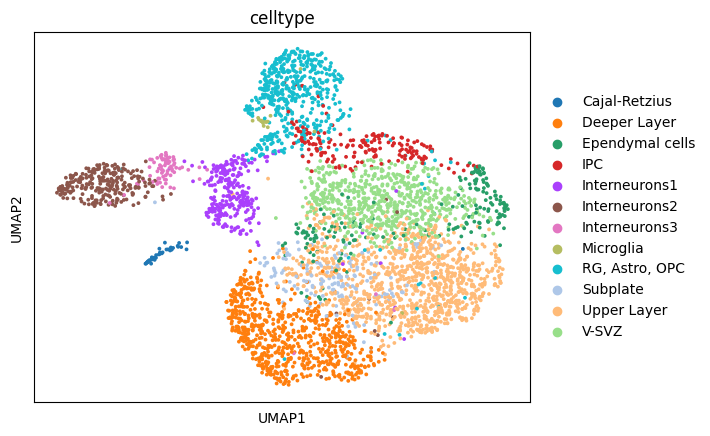

In [5]:
sc.pl.umap(adata_rna, color='celltype')

# Fit latentvelo for RNA and ATAC

In [6]:
model = ltv.models.ATACRegModel(observed=947, latent_dim=20, zr_dim=2, h_dim=2)

In [7]:
epochs, val_ae, val_traj = ltv.train_atac(model, adata, batch_size = 100,
                                      epochs=50, name='atac_reg', grad_clip=1000)

Warning, folder already exists. This may overwrite a previous fit.
761 velocity genes used
epoch 0, full loss 463.914, val loss 473.417, ae dist 1.432, traj dist 1.429, velo -1.798
epoch 1, full loss 140.708, val loss 184.810, ae dist 1.679, traj dist 1.476, velo -1.852
epoch 2, full loss -80.512, val loss -40.767, ae dist 1.157, traj dist 1.163, velo -1.821
epoch 3, full loss -213.462, val loss -219.913, ae dist 0.936, traj dist 1.010, velo -0.583
epoch 4, full loss -266.533, val loss -309.645, ae dist 0.871, traj dist 0.955, velo -0.421
epoch 5, full loss -273.129, val loss -350.226, ae dist 0.890, traj dist 0.933, velo -0.664
epoch 6, full loss -318.026, val loss -375.039, ae dist 0.767, traj dist 0.807, velo -0.766
epoch 7, full loss -322.629, val loss -398.734, ae dist 0.753, traj dist 0.773, velo -0.777
epoch 8, full loss -284.866, val loss -401.448, ae dist 0.872, traj dist 0.806, velo -0.736
epoch 9, full loss -343.055, val loss -407.316, ae dist 0.755, traj dist 0.747, velo -0

In [8]:
latent_adata, adata = ltv.output_atac_results(model, adata, gene_velocity=True)

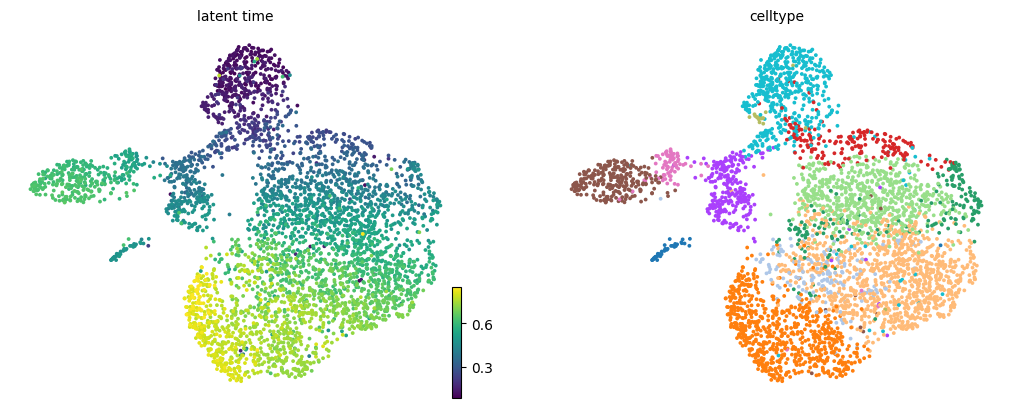

In [9]:
scv.pl.umap(latent_adata, color=['latent_time','celltype'])

In [10]:
scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity', xkey='spliced')
scv.tl.velocity_graph(latent_adata, vkey='unspliced_velocity', xkey='unspliced')
scv.tl.velocity_graph(latent_adata, vkey='chromatin_velocity', xkey='chromatin')

computing velocity graph (using 1/16 cores)


  0%|          | 0/4004 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/16 cores)


  0%|          | 0/4004 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'unspliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/16 cores)


  0%|          | 0/4004 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'chromatin_velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ../figures/model_atac_reg_mouse_brain_spliced_velo.png


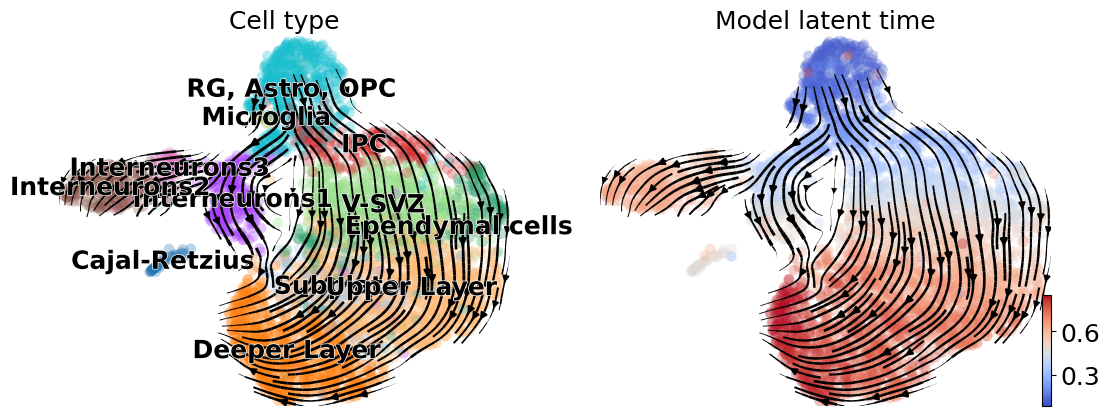

saving figure to file ../figures/model_atac_reg_mouse_brain_unspliced_velo.png


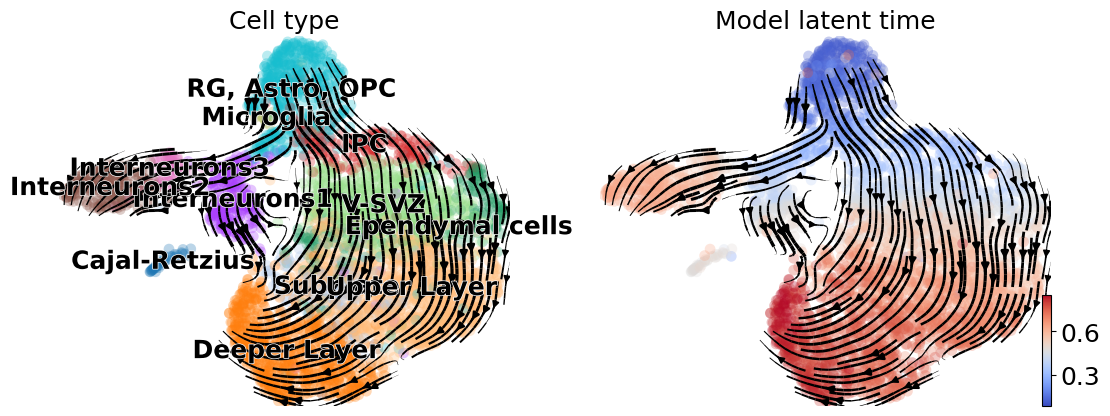

saving figure to file ../figures/model_atac_reg_mouse_brain_chromatin_velo.png


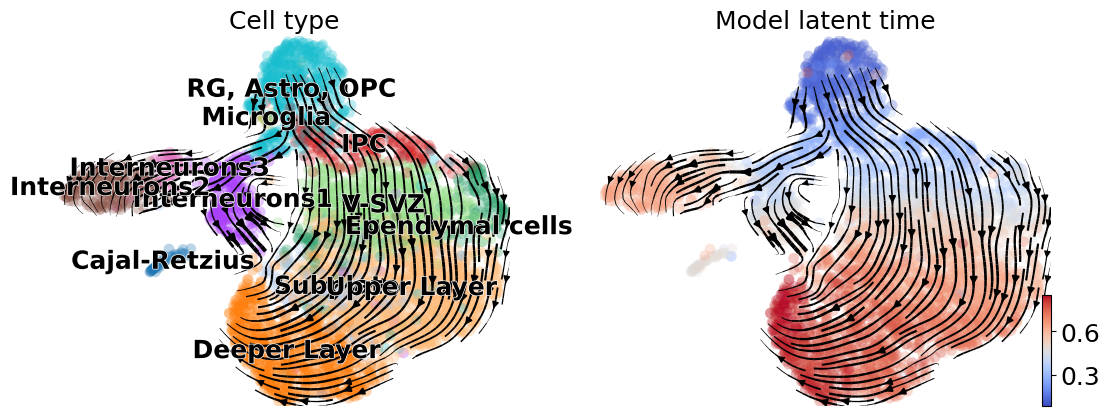

In [18]:
scv.pl.velocity_embedding_stream(latent_adata, 
                                 basis='umap',
                                 color=['celltype', 'latent_time'], 
                                 vkey='spliced_velocity',linewidth=1.5,
                                color_map='coolwarm',
                                title=['Cell type','Model latent time'], 
                                 save='../figures/model_atac_reg_mouse_brain_spliced_velo.png')

scv.pl.velocity_embedding_stream(latent_adata, 
                                 basis='umap',
                                 color=['celltype', 'latent_time'], 
                                 vkey='unspliced_velocity',linewidth=1.5,
                                color_map='coolwarm',
                                title=['Cell type','Model latent time'], 
                                 save='../figures/model_atac_reg_mouse_brain_unspliced_velo.png')

scv.pl.velocity_embedding_stream(latent_adata, 
                                 basis='umap',
                                 color=['celltype', 'latent_time'], 
                                 vkey='chromatin_velocity',linewidth=1.5,
                                color_map='coolwarm',
                                title=['Cell type','Model latent time'], 
                                 save='../figures/model_atac_reg_mouse_brain_chromatin_velo.png')

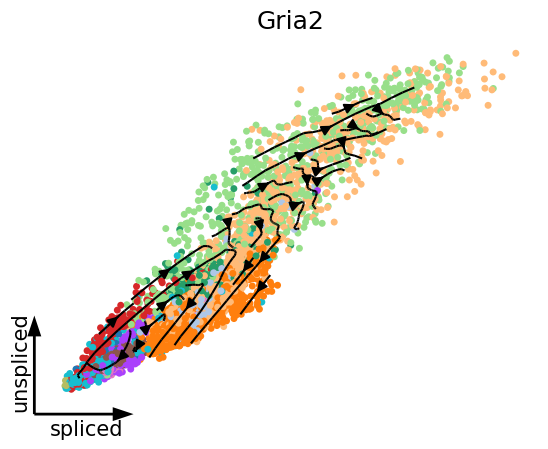

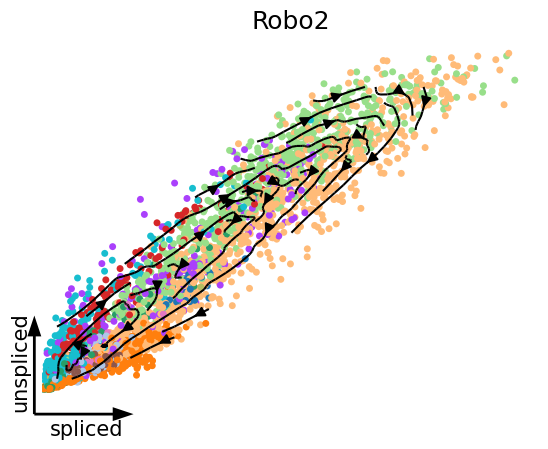

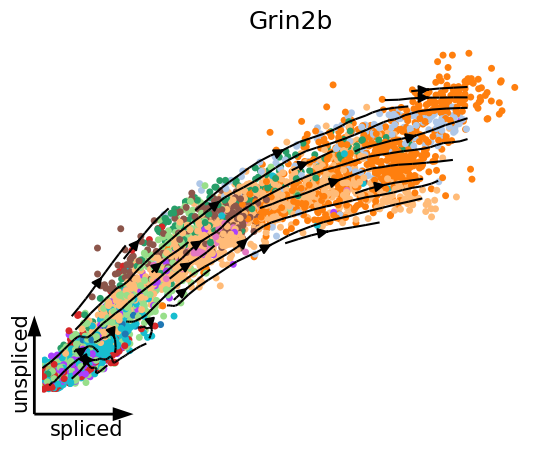

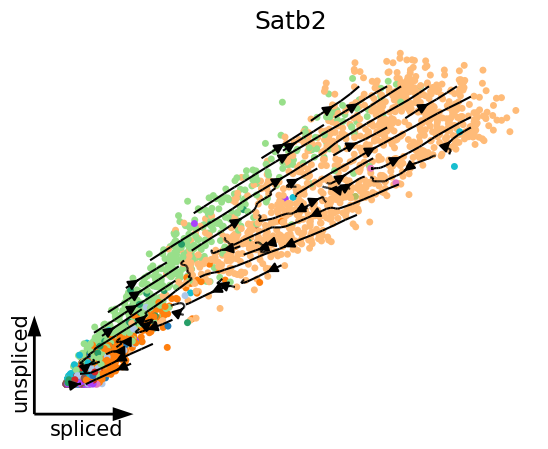

In [12]:
import matplotlib.pyplot as plt
ltv.pl.scatter_stream(adata, 'Gria2', cluster_key='celltype')#
plt.show()
#scatter_stream(adata, 'Smoc1', cluster_key='clusters')#,save=True)
#plt.show()
ltv.pl.scatter_stream(adata, 'Robo2', cluster_key='celltype')#,save=True)#,save=True)
plt.show()
ltv.pl.scatter_stream(adata, 'Grin2b', cluster_key='celltype')#,save=True)
plt.show()
ltv.pl.scatter_stream(adata, 'Satb2', cluster_key='celltype')#,save=True)
plt.show()
#scatter_stream(adata, 'Tmsb10', cluster_key='clusters')#,save=True)
#plt.show()

In [13]:
adata.obs['Gria2_s_direction'] = adata[:,adata.var.index.values=='Gria2'].layers['velo'][:,0] # > 0
adata.obs['Robo2_s_direction'] = adata[:,adata.var.index.values=='Robo2'].layers['velo'][:,0] # > 0
adata.obs['Grin2b_s_direction'] = adata[:,adata.var.index.values=='Grin2b'].layers['velo'][:,0] # > 0
adata.obs['Satb2_s_direction'] = adata[:,adata.var.index.values=='Satb2'].layers['velo'][:,0] # > 0

adata.obs['Gria2_u_direction'] = adata[:,adata.var.index.values=='Gria2'].layers['velo_u'][:,0] # > 0
adata.obs['Robo2_u_direction'] = adata[:,adata.var.index.values=='Robo2'].layers['velo_u'][:,0] # > 0
adata.obs['Grin2b_u_direction'] = adata[:,adata.var.index.values=='Grin2b'].layers['velo_u'][:,0] # > 0
adata.obs['Satb2_u_direction'] = adata[:,adata.var.index.values=='Satb2'].layers['velo_u'][:,0] # > 0

adata.obs['Gria2_c_direction'] = adata[:,adata.var.index.values=='Gria2'].layers['velo_c'][:,0] # > 0
adata.obs['Robo2_c_direction'] = adata[:,adata.var.index.values=='Robo2'].layers['velo_c'][:,0] # > 0
adata.obs['Grin2b_c_direction'] = adata[:,adata.var.index.values=='Grin2b'].layers['velo_c'][:,0] # > 0
adata.obs['Satb2_c_direction'] = adata[:,adata.var.index.values=='Satb2'].layers['velo_c'][:,0] # > 0

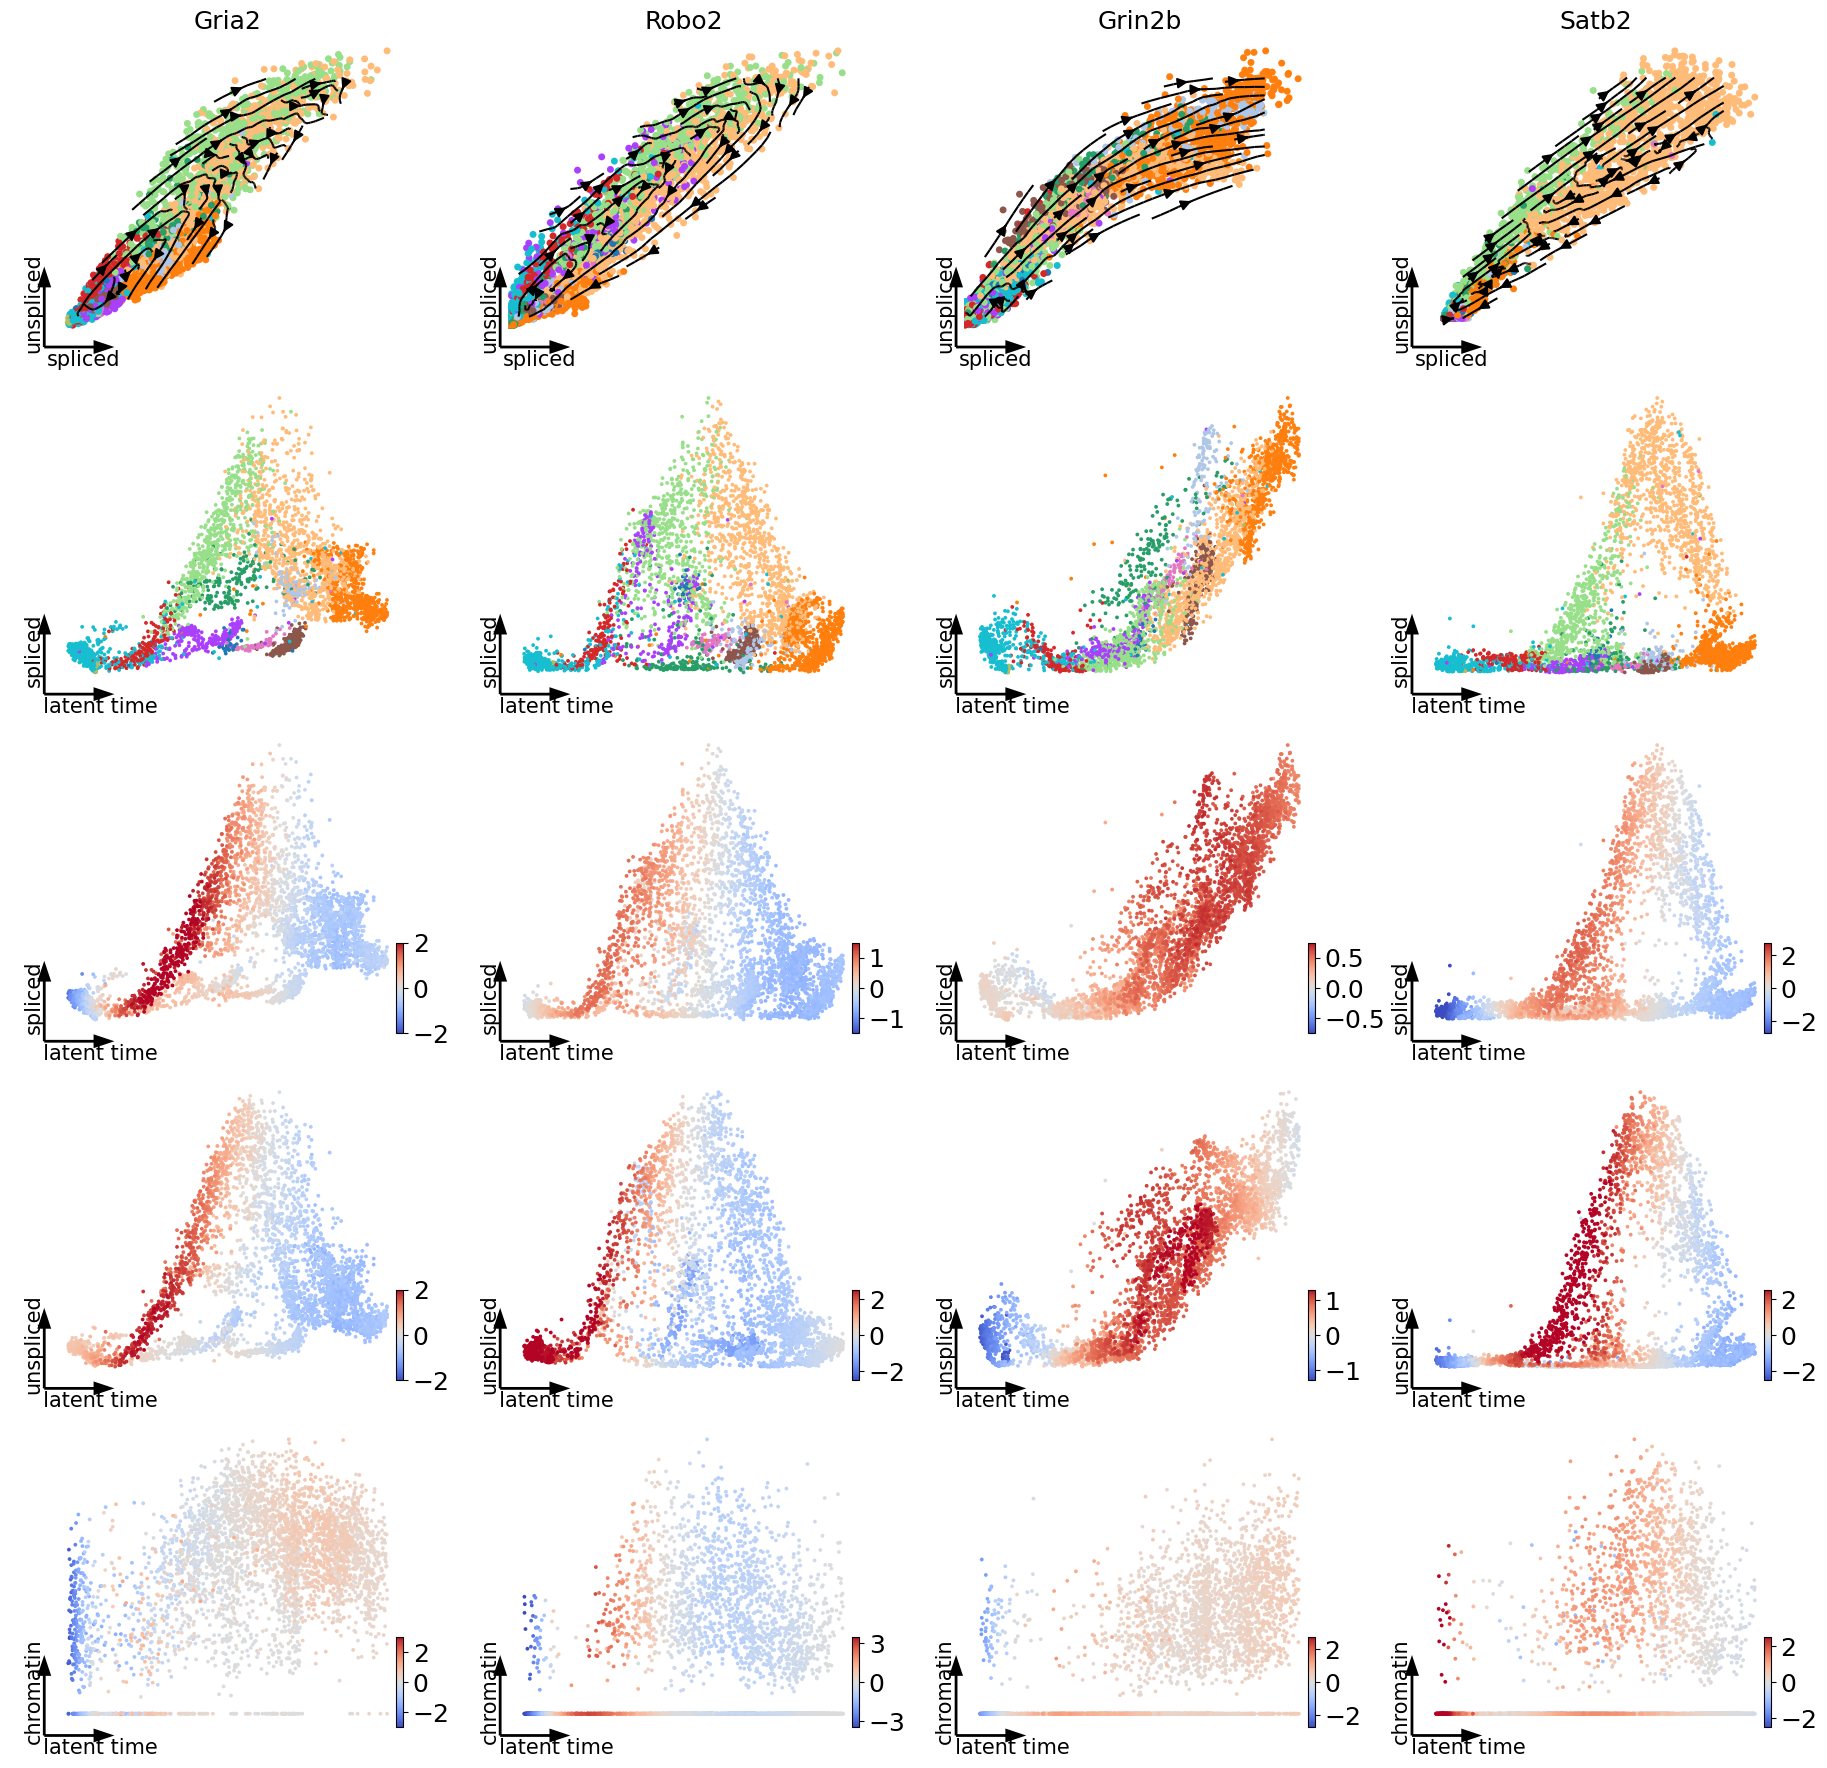

In [14]:
fig,ax=plt.subplots(5,4,figsize=(18,18))
ax=ax.T.flatten()

ltv.pl.scatter_stream(adata, 'Gria2', cluster_key='celltype',ax=ax[0],min_density=0.1)#
scv.pl.scatter(adata, x='latent_time', y='Gria2', color='celltype', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[1],show=False,
               xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Gria2', color='Gria2_s_direction', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[2],show=False,vmin=-2, vmax=2,
               xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Gria2', color='Gria2_u_direction', color_map='coolwarm',
               title='',  frameon='artist',ax=ax[3],
              layer='unspliced',show=False,vmin=-2, vmax=2,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Gria2', color='Gria2_c_direction', color_map='coolwarm',
               title='',  frameon='artist',ax=ax[4],
              layer='chromatin',show=False,vmin=-3, vmax=3,xlabel='     latent time')

ltv.pl.scatter_stream(adata, 'Robo2', cluster_key='celltype',ax=ax[5],min_density=0.1)#
scv.pl.scatter(adata, x='latent_time', y='Robo2', color='celltype', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[6],show=False,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Robo2', color='Robo2_s_direction', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[7],show=False,vmin=-1.5, vmax=1.5,
               xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Robo2', color='Robo2_u_direction', color_map='coolwarm',
               title='', frameon='artist',ax=ax[8],
              layer='unspliced',show=False,vmin=-2.5, vmax=2.5,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Robo2', color='Robo2_c_direction', color_map='coolwarm',
               title='',  frameon='artist',ax=ax[9],
              layer='chromatin',show=False,vmin=-3.5, vmax=3.5,xlabel='     latent time')


ltv.pl.scatter_stream(adata, 'Grin2b', cluster_key='celltype',ax=ax[10],min_density=0.1)#
scv.pl.scatter(adata, x='latent_time', y='Grin2b', color='celltype', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[11],show=False,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Grin2b', color='Grin2b_s_direction', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[12],show=False,vmin=-0.75, vmax=0.75,
               xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Grin2b', color='Grin2b_u_direction', color_map='coolwarm',
               title='', frameon='artist',ax=ax[13],
              layer='unspliced',show=False,vmin=-1.3, vmax=1.3,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Grin2b', color='Grin2b_c_direction', color_map='coolwarm',
               title='',  frameon='artist',ax=ax[14],
              layer='chromatin',show=False,vmin=-2.75, vmax=2.75,xlabel='     latent time')

ltv.pl.scatter_stream(adata, 'Satb2', cluster_key='celltype',ax=ax[15],min_density=0.1)#
scv.pl.scatter(adata, x='latent_time', y='Satb2', color='celltype', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[16],show=False,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Satb2', color='Satb2_s_direction', color_map='coolwarm',
               title='', frameon='artist', layer='spliced',ax=ax[17],show=False,vmin=-2.75, vmax=2.75,
               xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Satb2', color='Satb2_u_direction', color_map='coolwarm',
               title='', frameon='artist',ax=ax[18],
              layer='unspliced',show=False,vmin=-2.5, vmax=2.5,xlabel='     latent time')
scv.pl.scatter(adata, x='latent_time', y='Satb2', color='Satb2_c_direction', color_map='coolwarm',
               title='', frameon='artist',ax=ax[19],
              layer='chromatin',show=False,vmin=-2.5, vmax=2.5,
              xlabel='     latent time')


plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.15)
plt.savefig('../figures/atac_gene_dynamics.png')
plt.show()